# Problem Statement :
# Perform clustering (Hierarchical, K Means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

In [1]:
# Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score,silhouette_samples

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset

airlines=pd.read_excel("EastWestAirlines (2).xlsx",sheet_name="data")

In [3]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airlines.size

47988

In [8]:
airlines.shape

(3999, 12)

In [9]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
# Column Rename and Set ID as Index Column

airlines.rename(columns={"ID#": "ID","Award?":"Award"},inplace=True)
airlines.set_index("ID",inplace=True)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [11]:
# Different cc_miles have different max values. so, we want to check what values these columns can take

print('unique_cc1',airlines.cc1_miles.unique())
print('unique_cc2',airlines.cc2_miles.unique())
print('unique_cc3',airlines.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [12]:
# Missing Values

airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

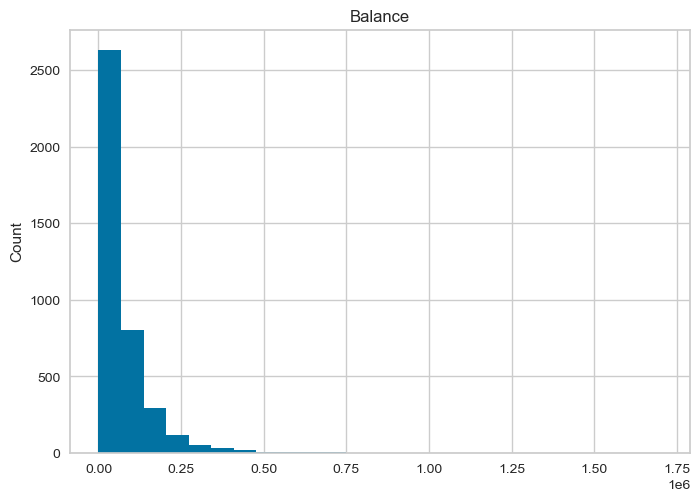

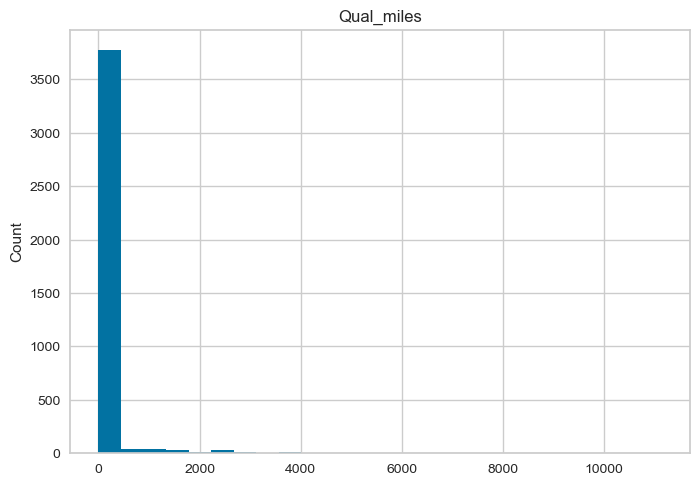

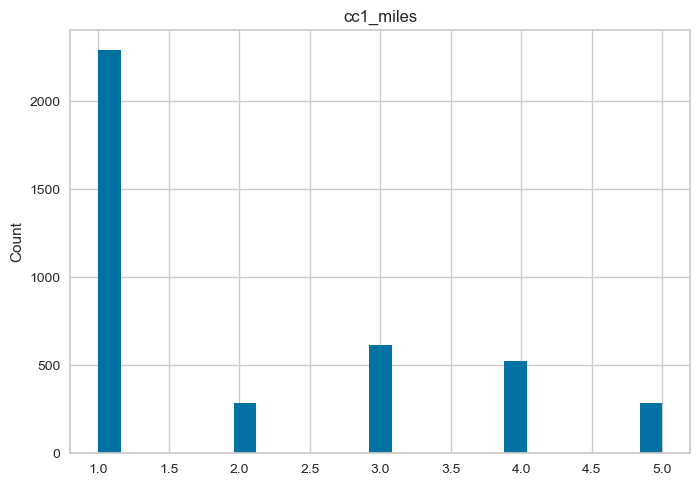

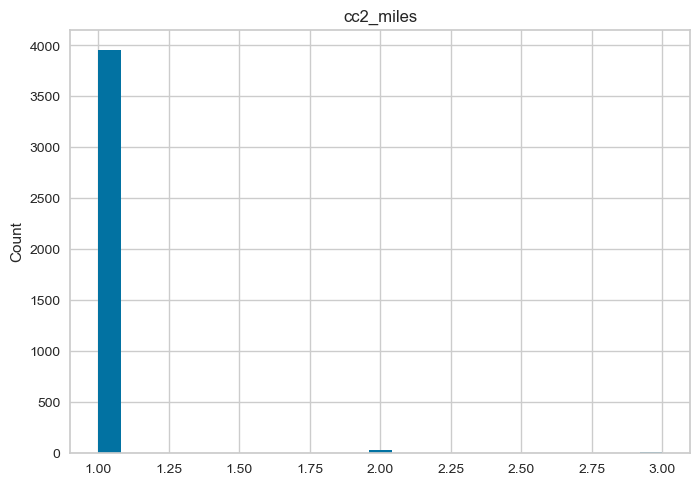

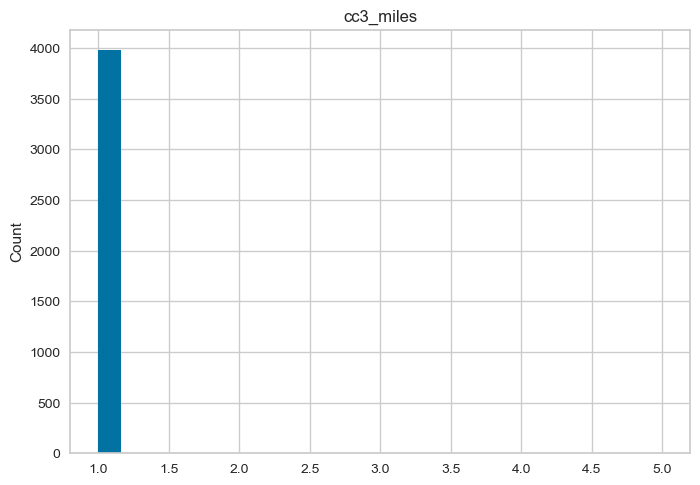

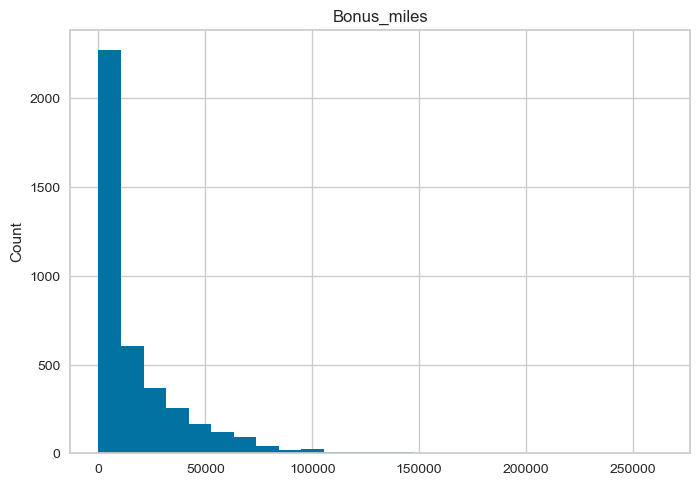

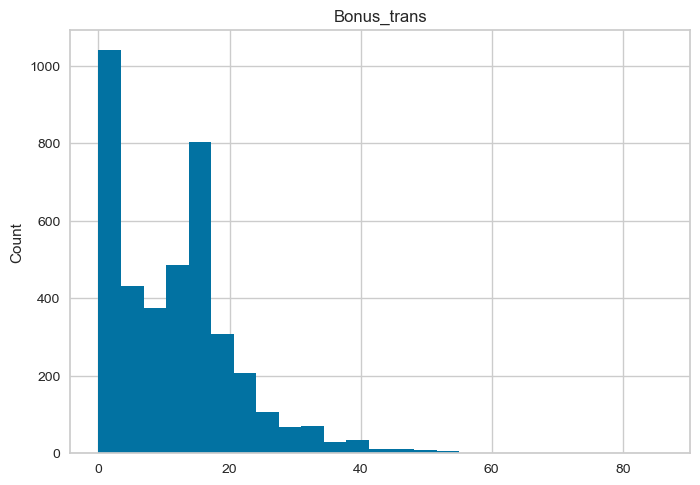

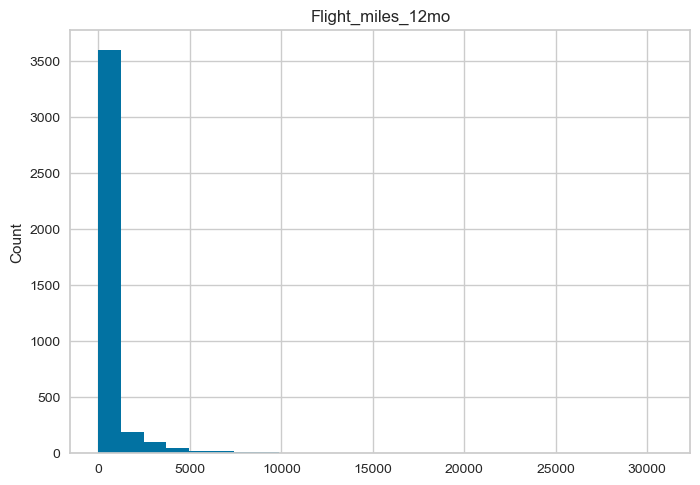

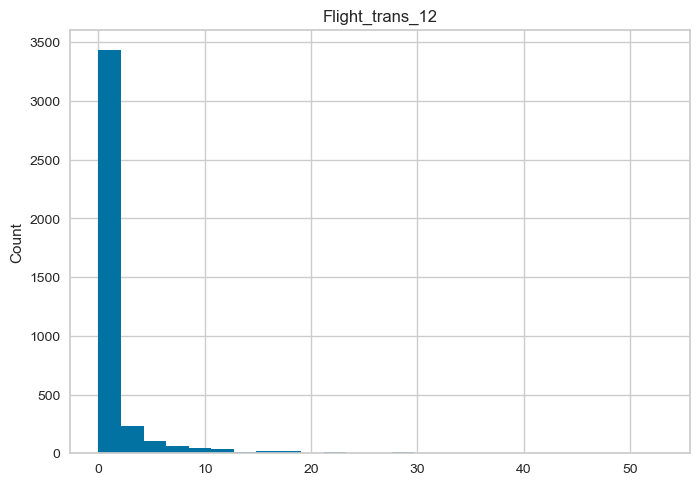

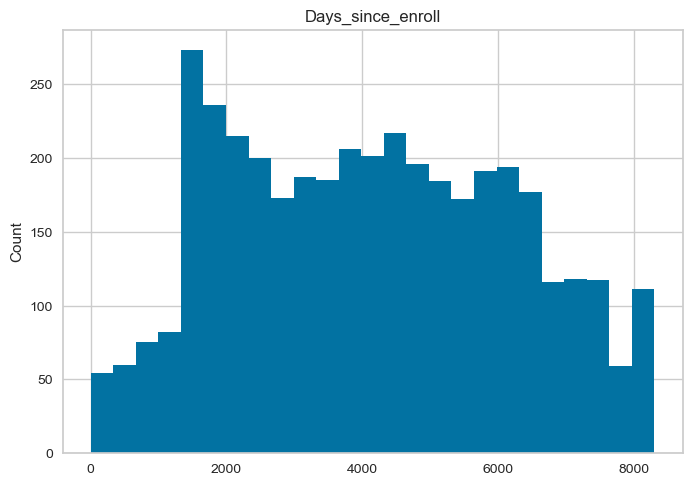

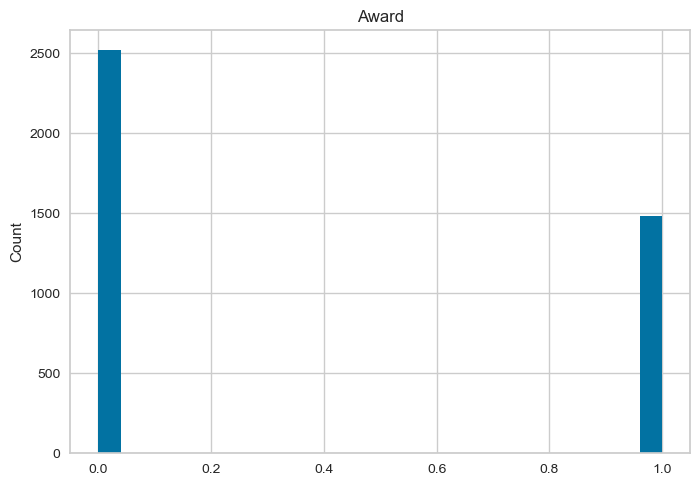

In [13]:
# EDA

# Analyze the features by creating histograms to understand the distribution

for feature in airlines.columns:
    airlines1=airlines.copy()
    airlines1[feature].hist(bins=25)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    

In [14]:
# Outliers Detection

airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

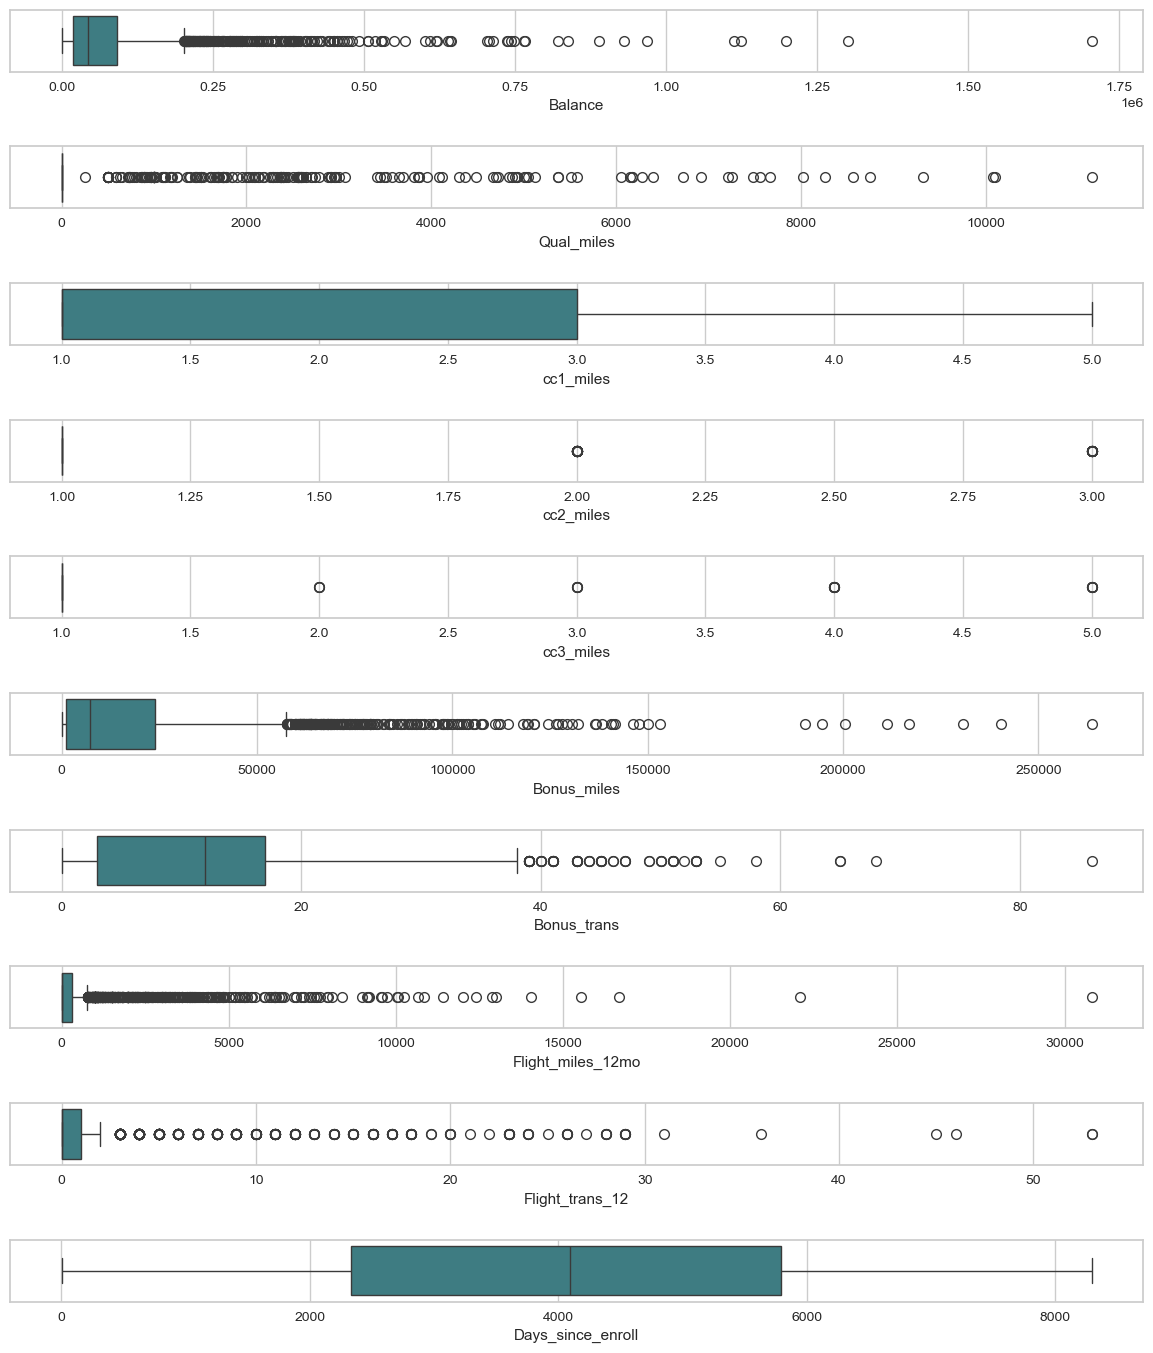

In [15]:
outlier=airlines.copy()
fig,axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x="Balance",data=outlier,palette="crest",ax=axes[0])
sns.boxplot(x="Qual_miles",data=outlier,palette="crest",ax=axes[1])
sns.boxplot(x="cc1_miles",data=outlier,palette="crest",ax=axes[2])
sns.boxplot(x="cc2_miles",data=outlier,palette="crest",ax=axes[3])
sns.boxplot(x="cc3_miles",data=outlier,palette="crest",ax=axes[4])
sns.boxplot(x="Bonus_miles",data=outlier,palette="crest",ax=axes[5])
sns.boxplot(x="Bonus_trans",data=outlier,palette="crest",ax=axes[6])
sns.boxplot(x="Flight_miles_12mo",data=outlier,palette="crest",ax=axes[7])
sns.boxplot(x="Flight_trans_12",data=outlier,palette="crest",ax=axes[8])
sns.boxplot(x="Days_since_enroll",data=outlier,palette="crest",ax=axes[9])
plt.tight_layout(pad=2.0)


In [16]:
countNotermdeposit=len(airlines[airlines.Award==0])
countHavetermdeposit=len(airlines[airlines.Award==1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(airlines.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(airlines.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


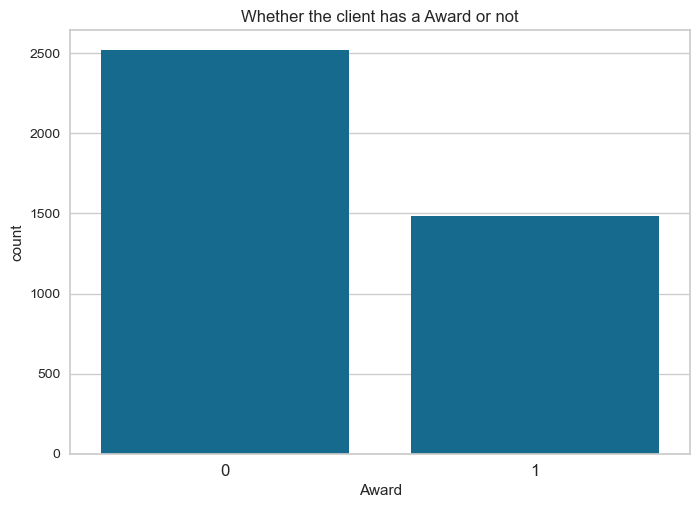

In [17]:
sns.countplot(x="Award",data=airlines,order=airlines["Award"].value_counts().index)
plt.xticks(fontsize=12)
plt.title("Whether the client has a Award or not")
plt.show()

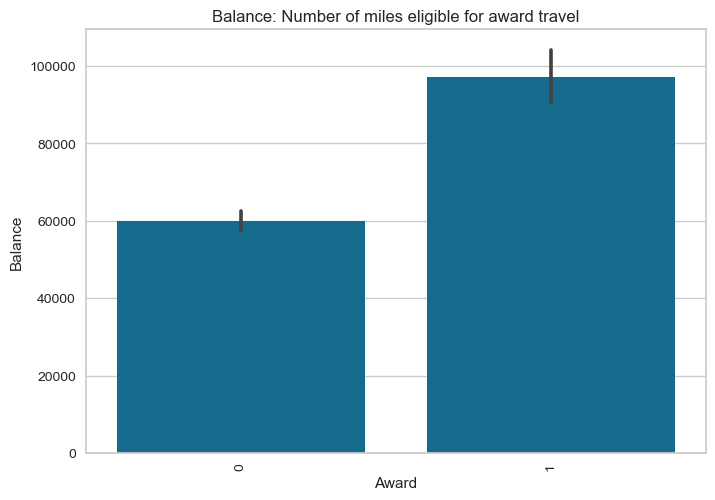

In [18]:
Balance=airlines[["Award","Balance"]].sort_values("Balance",ascending=False)
ax=sns.barplot(x="Award",y="Balance",data=Balance)
ax.set(xlabel="Award",ylabel="Balance")
plt.title("Balance: Number of miles eligible for award travel")
plt.xticks(rotation=90)
plt.show()

In [19]:
corr_matrix=airlines.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

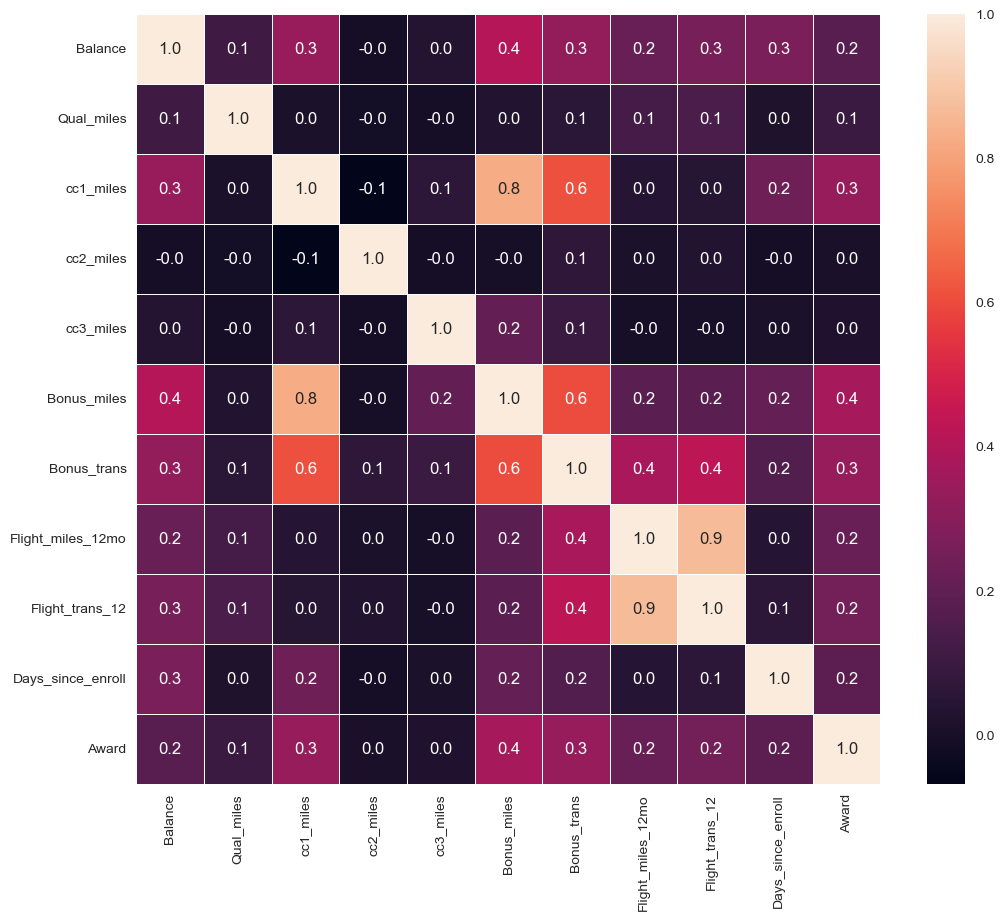

In [20]:
# Correlation Heatmap

f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(airlines.corr(),annot=True,linewidths=.5,fmt=".1f",ax=ax)
plt.show

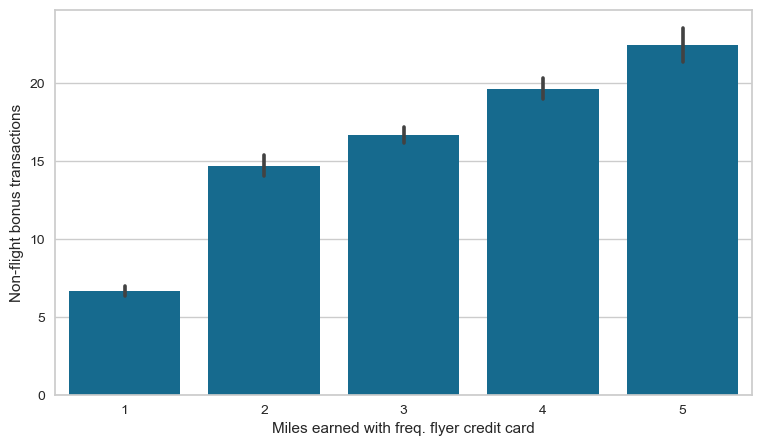

In [21]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions

plt.figure(figsize=(9,5))
sorted_data=airlines[["cc1_miles","Bonus_trans"]].sort_values("Bonus_trans",ascending=False)
ax=sns.barplot(x="cc1_miles",y="Bonus_trans",data=sorted_data)
ax.set(xlabel="Miles earned with freq. flyer credit card",ylabel="Non-flight bonus transactions")
plt.show()

In [22]:
# Standardizing the Data

standard_scaler=StandardScaler()
std_airlines=standard_scaler.fit_transform(airlines)
std_airlines.shape

(3999, 11)

In [23]:
# Normalizing the data

minmax=MinMaxScaler()
norm_airlines=minmax.fit_transform(airlines)
norm_airlines.shape

(3999, 11)

In [24]:
# K Means Clustering

# Elbow Method for Determining Cluster Amount

# Standard Scaler Applied on Data

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airlines)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df


,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.246825
3,4,27162.193190
4,5,24541.329582
5,6,21470.860946
6,7,20360.448419
7,8,17316.703058
8,9,15959.647036
9,10,14732.229882


Text(0, 0.5, 'WCSS')

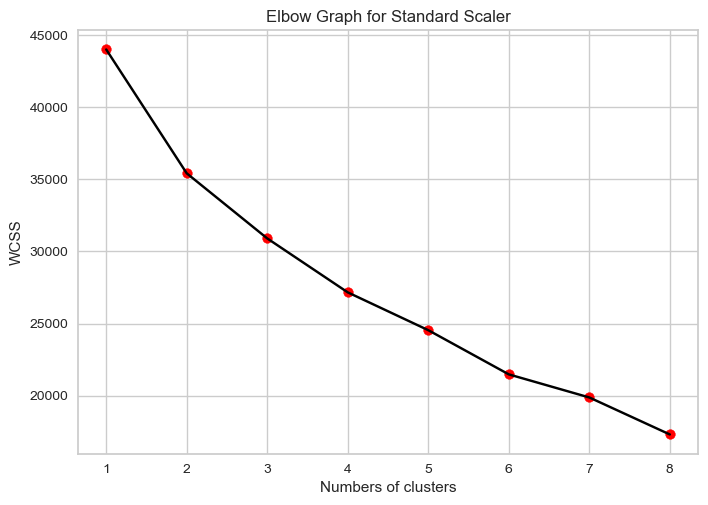

In [25]:
# WCSS (Within-Cluster Sum-of-Squares Criterion)

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_airlines)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,9),wcss,color="black")
plt.scatter(range(1,9),wcss,color="red")
plt.title("Elbow Graph for Standard Scaler")
plt.xlabel("Numbers of clusters")
plt.ylabel("WCSS")

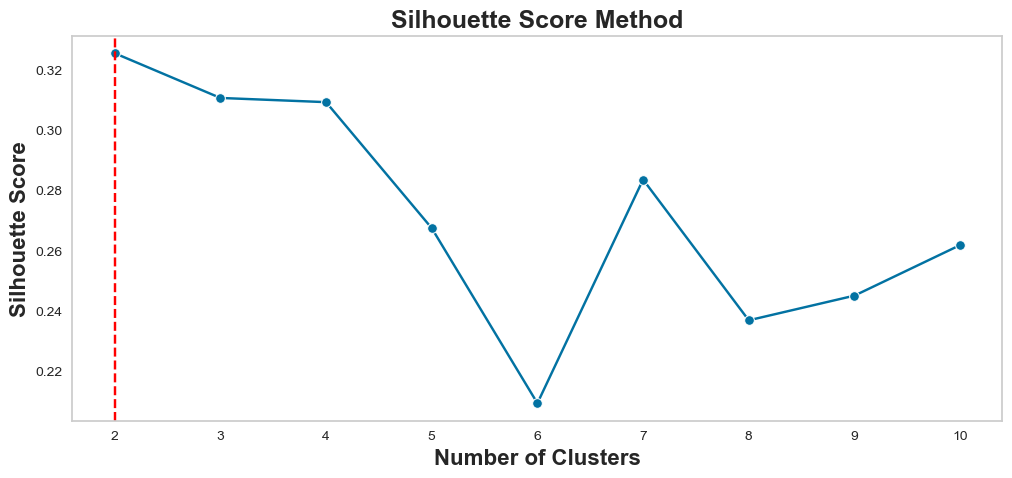

In [26]:
# Silhouette Score

from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airlines)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_airlines, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

# Creating a DataFrame for Seaborn

data = {'Number of Clusters': n_clusters, 'Silhouette Score': s_scores}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x='Number of Clusters', y='Silhouette Score', marker='o', data=df, ax=ax)
ax.set_title("Silhouette Score Method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of Clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette Score", fontweight='bold', fontsize=16)
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


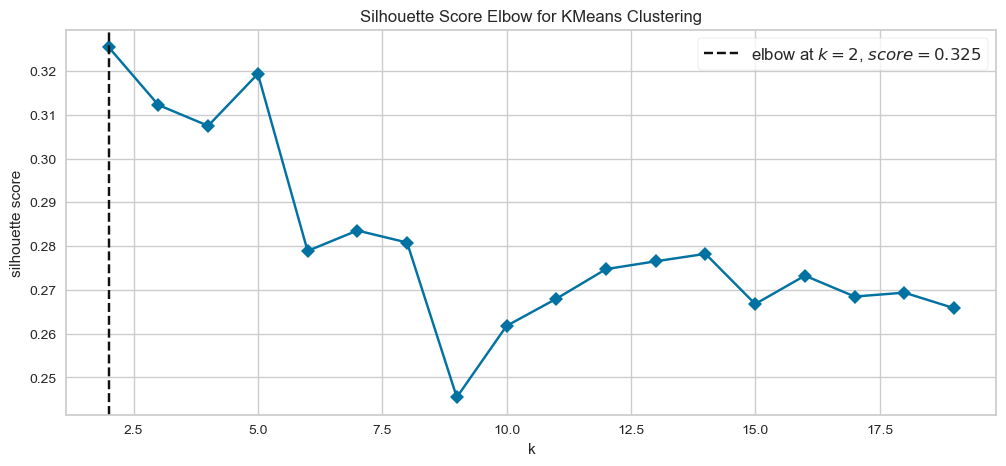

In [27]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
fig, ax = plt.subplots(figsize=(12,5))

# Fit the data and visualize

print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_airlines)    
visualizer.poof()
plt.show()

In [28]:
clust_list=[2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(std_airlines)
    sil_score1=silhouette_score(std_airlines,cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


In [29]:
# Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset
# We have found good number of cluster = 6
# Model building using cluster numbers = 6

model_kmeans=KMeans(n_clusters=6,random_state=0,init="k-means++")
y_predict_kmeans=model_kmeans.fit_predict(std_airlines)
y_predict_kmeans.shape

(3999,)

In [30]:
y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2])

In [31]:
model_kmeans.labels_


array([2, 2, 2, ..., 1, 2, 2])

In [32]:
model_kmeans.cluster_centers_


array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [33]:
model_kmeans.inertia_


21089.973628929638

In [34]:
# Assigning clusters to the data set

airlines_df=pd.read_excel("EastWestAirlines (2).xlsx",sheet_name="data")
airlines_df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
airlines_df["Kmeans_Label"]=model_kmeans.labels_

In [35]:
# Grouping the data by Clusters (K=6)

airlines_df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,1599.831858,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,2233.860465,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


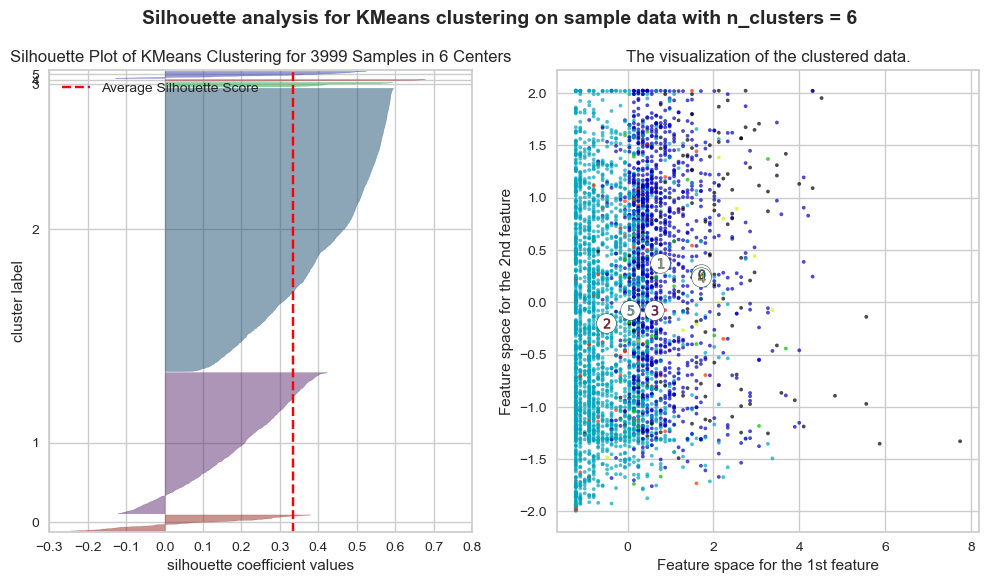

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_airlines)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_airlines[:, 6], std_airlines[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

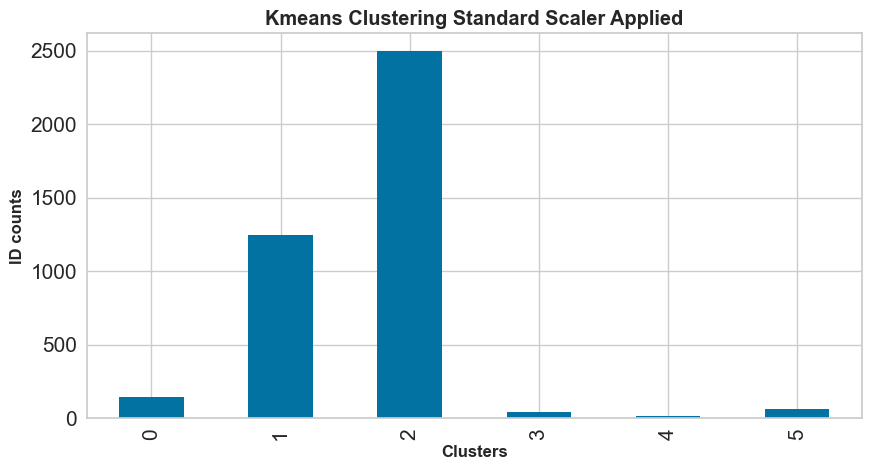

In [37]:
 # Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig,ax=plt.subplots(figsize=(10,5))
airlines_df.groupby(["Kmeans_Label"]).count()["ID"].plot(kind="bar")
plt.ylabel("ID Counts")
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [38]:
# Elbow Method and Silhouette Score on MinMaxScaler Applied Data

cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10)
    clusters.fit(norm_airlines)
    labels=clusters.labels_
    centriods=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"Clusters_Num":cluster_range,"cluster_Errors":cluster_errors})
clusters_df

,Clusters_Num,cluster_Errors
0,1,1830.793213
1,2,823.675698
2,3,625.168488
3,4,436.708858
4,5,348.943322
5,6,315.315596
6,7,287.942116
7,8,263.047264
8,9,245.406592
9,10,226.124322


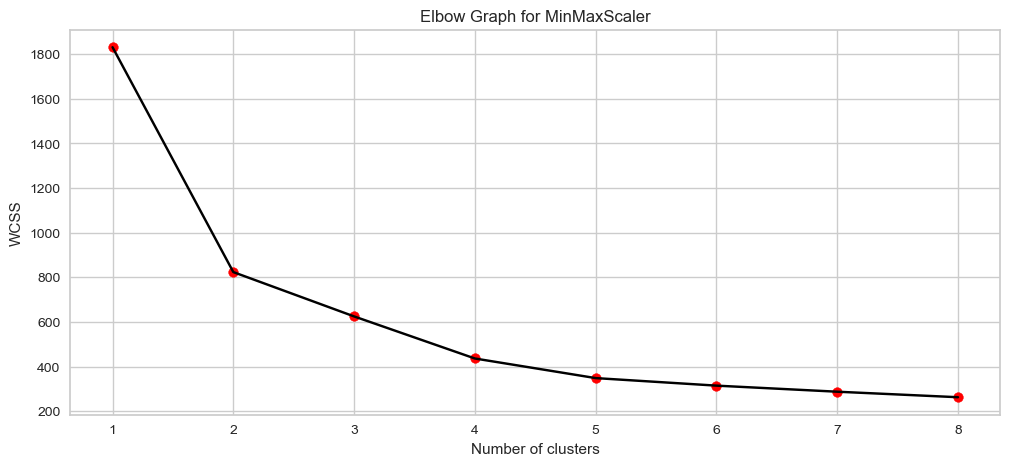

In [39]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airlines)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

fig,ax=plt.subplots(figsize=(12,5))
plt.plot(range(1,9),wcss,color="black")
plt.scatter(range(1,9),wcss,color="red")
plt.title("Elbow Graph for MinMaxScaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

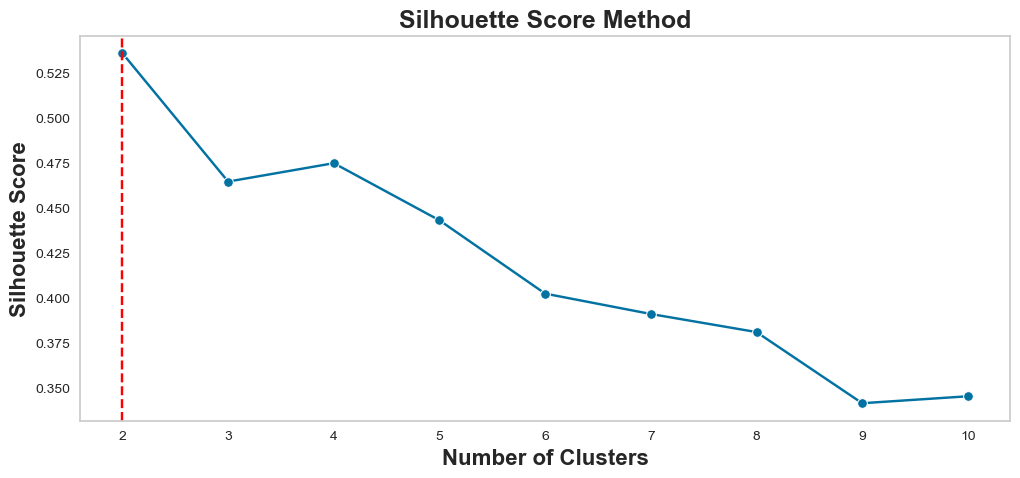

In [40]:
# Silhouette Score

from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(norm_airlines)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(norm_airlines, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

# Creating a DataFrame for Seaborn

data = {'Number of Clusters': n_clusters, 'Silhouette Score': s_scores}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x='Number of Clusters', y='Silhouette Score', marker='o', data=df, ax=ax)
ax.set_title("Silhouette Score Method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of Clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette Score", fontweight='bold', fontsize=16)
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Normalization data


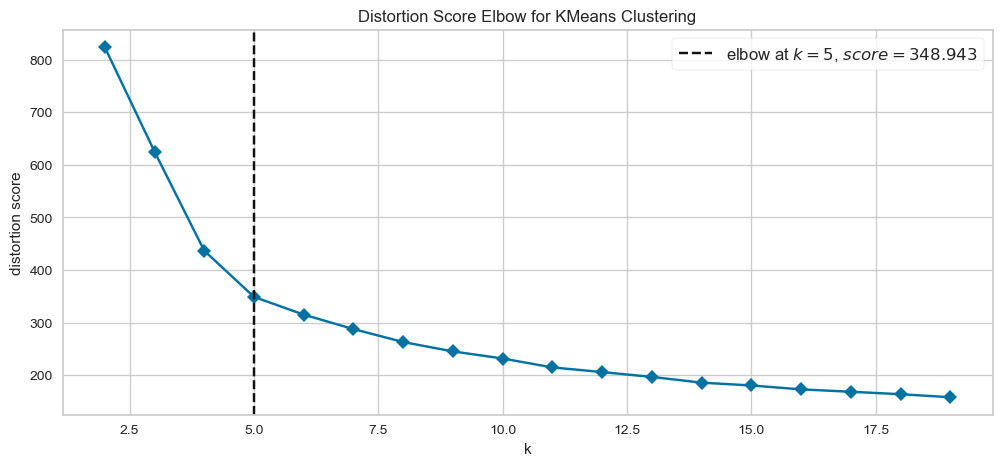

<function matplotlib.pyplot.show(close=None, block=None)>

In [41]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model=KMeans(random_state=10,max_iter=500,init="k-means++")
plt.subplots(figsize=(12,5))

# Instantiate the KElbowVisualizer with the number of clusters and the metric

visualizer=KElbowVisualizer(model,k=(2,20),metrics="silhouette",timings=False)

# Fit the data and visualize
print('Elbow Plot for Normalization data')

visualizer.fit(norm_airlines)
visualizer.poof()
plt.show

In [42]:
clust_list=[2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(norm_airlines)
    sil_score=silhouette_score(norm_airlines,cluster_labels1)
    print("For n_clusters=",n_clusters,"The average silhouette_score is:",sil_score1)
    
clust_list=[2,3,4,5,6,7,8,9]

For n_clusters= 2 The average silhouette_score is: 0.2984364654012059
For n_clusters= 3 The average silhouette_score is: 0.2984364654012059
For n_clusters= 4 The average silhouette_score is: 0.2984364654012059
For n_clusters= 5 The average silhouette_score is: 0.2984364654012059
For n_clusters= 6 The average silhouette_score is: 0.2984364654012059
For n_clusters= 7 The average silhouette_score is: 0.2984364654012059
For n_clusters= 8 The average silhouette_score is: 0.2984364654012059
For n_clusters= 9 The average silhouette_score is: 0.2984364654012059


In [43]:
# Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

# We have found good number of cluster = 2

# Model building using cluster numbers = 2

model_kmeas=KMeans(n_clusters=2,random_state=0,init="k-means++")
y_predict_kmeans=model_kmeans.fit_predict(norm_airlines)
y_predict_kmeans.shape

(3999,)

In [44]:
y_predict_kmeans


array([0, 0, 0, ..., 1, 4, 4])

In [45]:
model_kmeans.labels_


array([0, 0, 0, ..., 1, 4, 4])

In [46]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -4.99600361e-16],
       [ 4.11842030e-02,  1.54948971e-02,  4.32345361e-01,
         2.57731959e-03,  2.57731959e-03,  7.14976124e-02,
         1.95606569e-01,  1.47541239e-02,  2.43143357e-02,
         5.36565683e-01,  1.00000000e+00],
       [ 5.11158156e-02,  2.86306329e-02, -1.11022302e-16,
         1.84859155e-02,  8.80281690e-04,  3.02892215e-02,
         1.10362758e-01,  3.69075602e-02,  6.55726814e-02,
         5.21925955e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
  

In [47]:
model_kmeans.inertia_


319.01115138210815

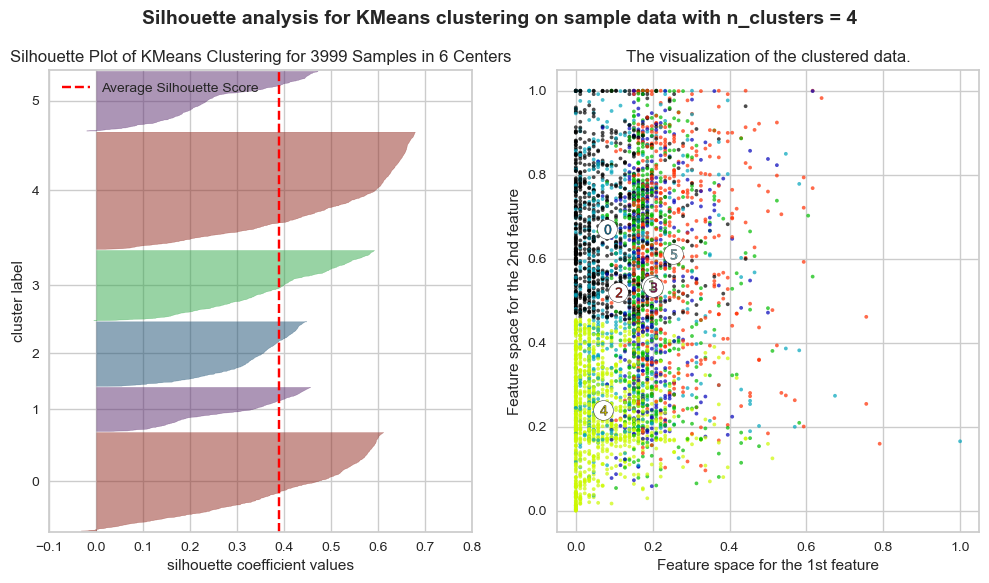

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_airlines)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(norm_airlines[:, 6], norm_airlines[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

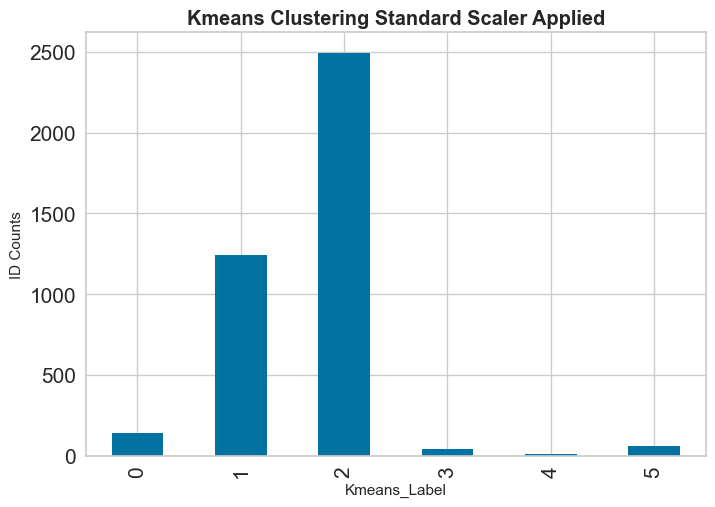

In [49]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

airlines_df.groupby(["Kmeans_Label"]).count()["ID"].plot(kind="bar")
plt.ylabel("ID Counts")
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [50]:
# Group data by Clusters (K=2)

airlines_df.groupby("Kmeans_Label").agg(["mean"])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,1599.831858,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,2233.860465,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


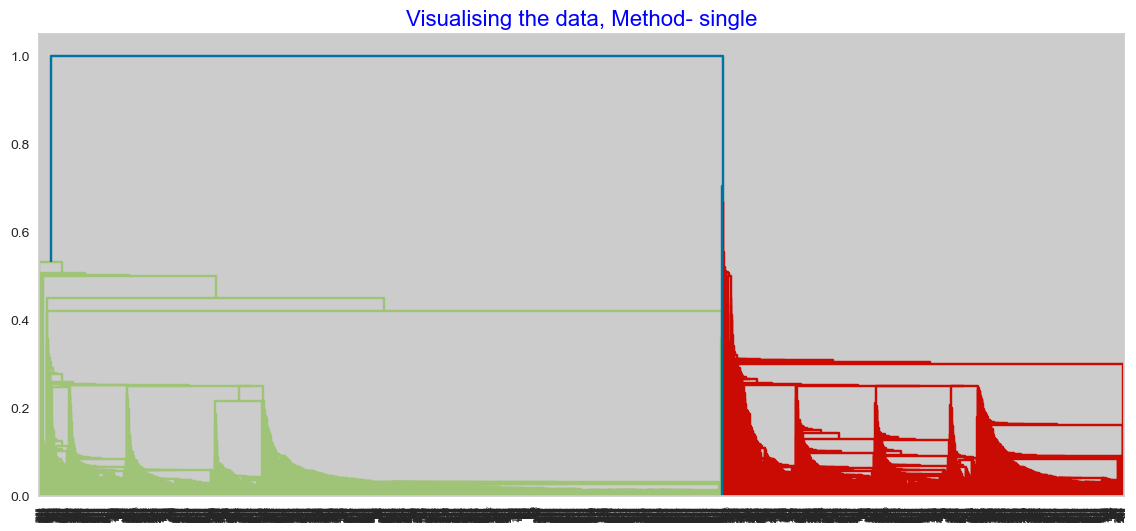

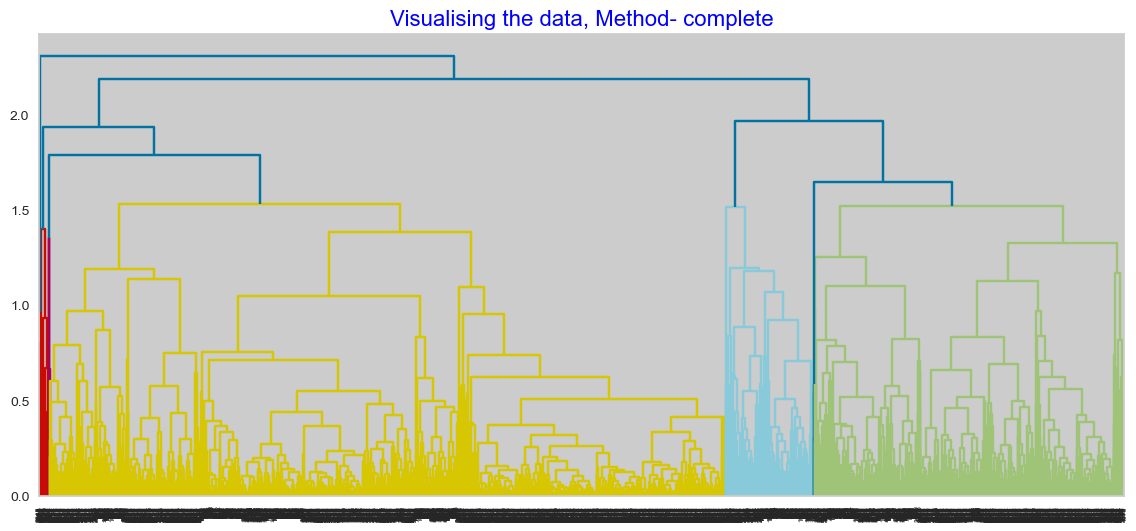

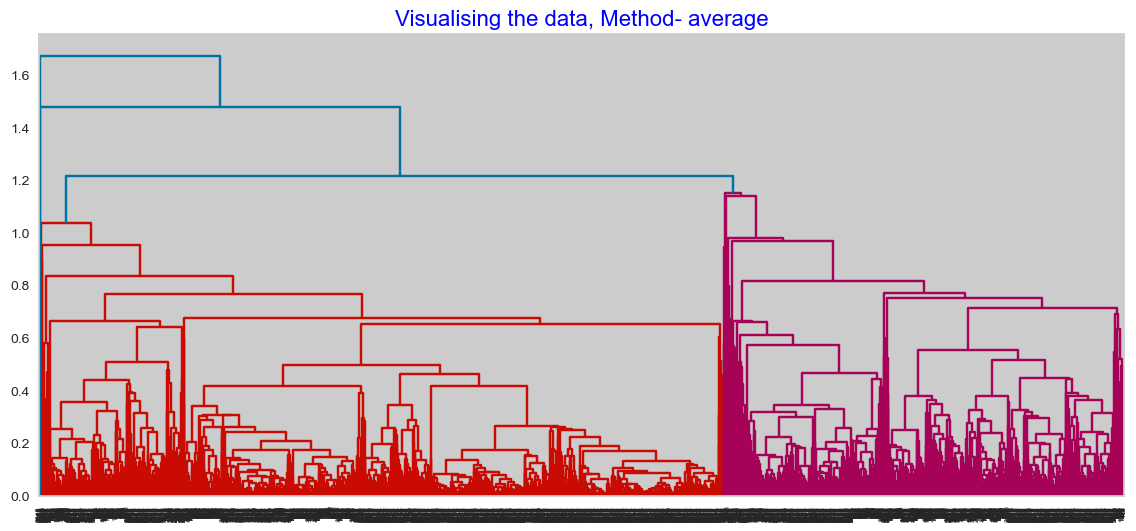

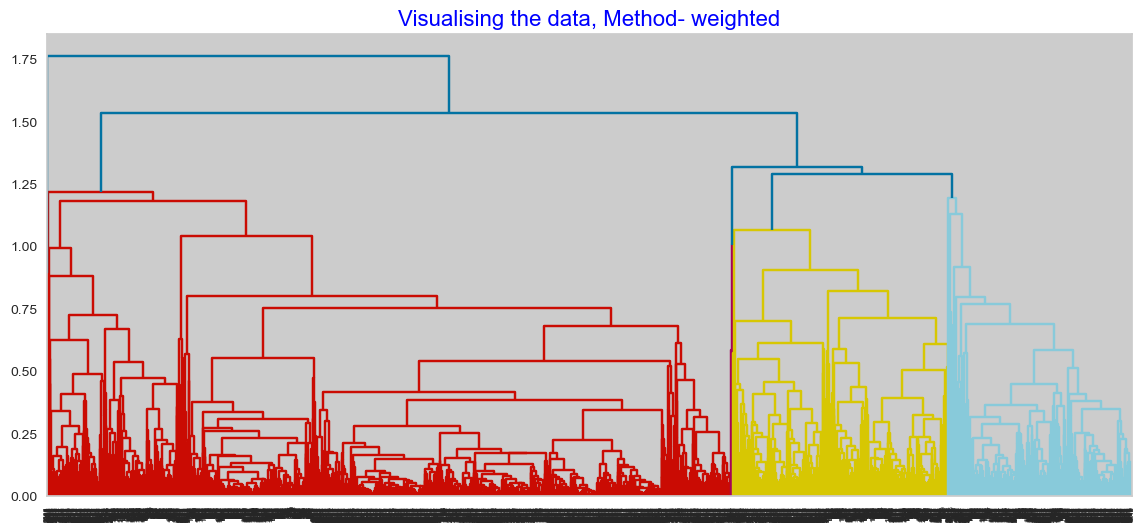

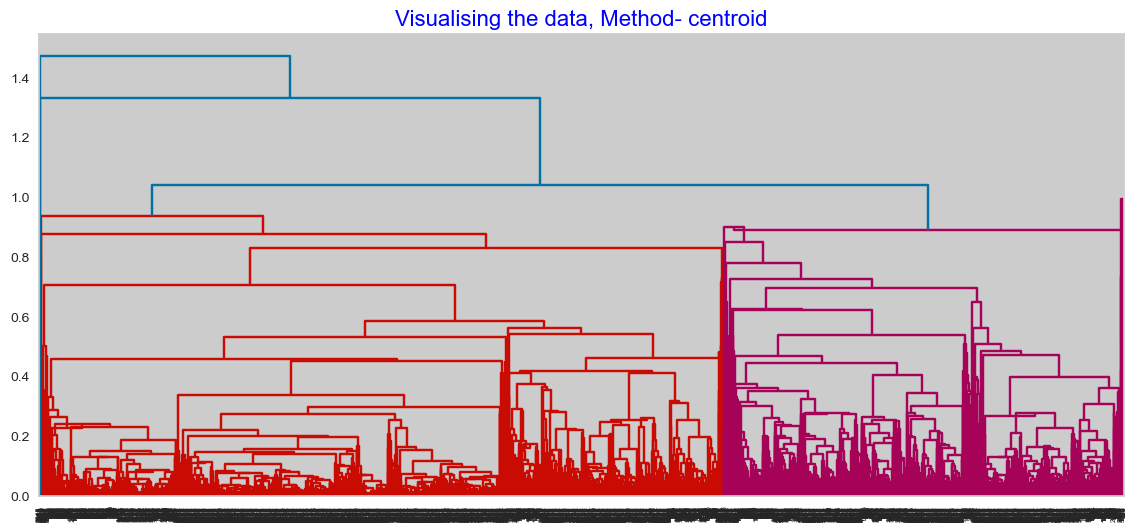

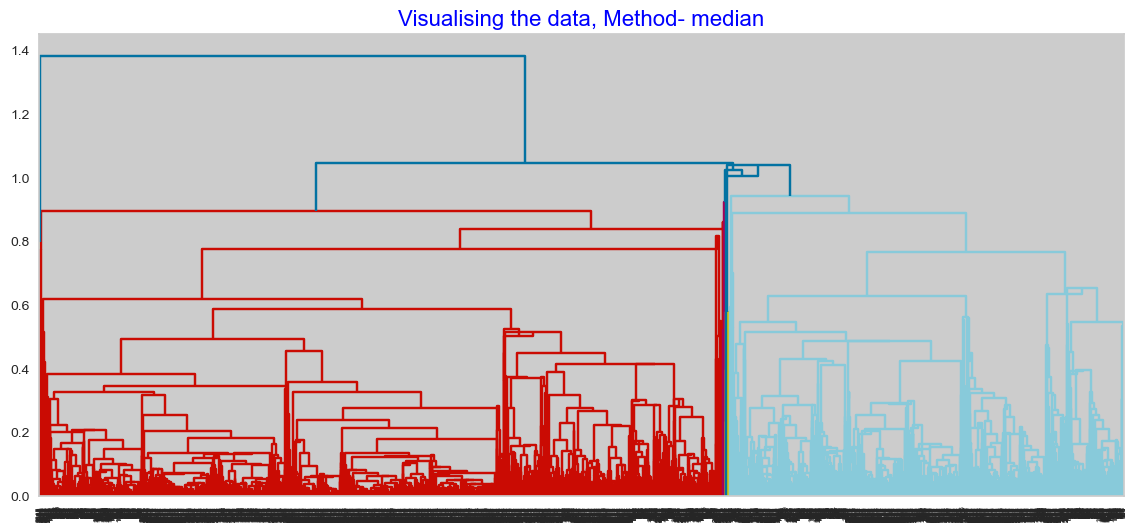

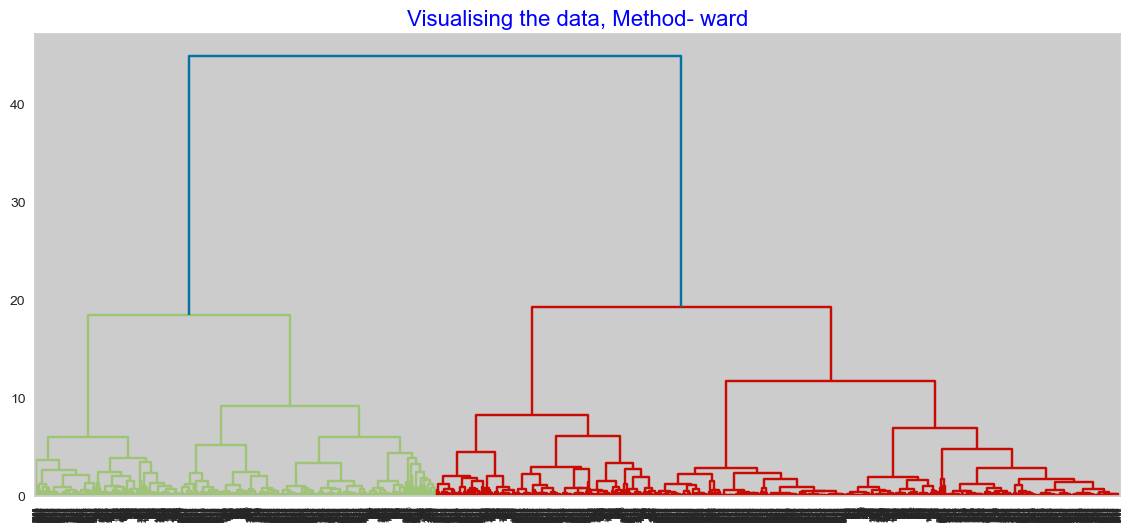

In [51]:
# Hierarchical Clustering Algorithm

# Dendogram on MinMaxScaler Applied on Dataset
    
for methods in ["single","complete","average","weighted","centroid","median","ward"]:
    plt.figure(figsize=(14,6))
    dict={"fontsize":16,"fontweight":14,"color":"blue"}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1=sch.dendrogram(sch.linkage(norm_airlines,method=methods,optimal_ordering=False))

In [52]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_airlines)
        silhouette_score2 = silhouette_score(std_airlines, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

In [53]:
# Run Hierarchical Clustering (Agglomerative Clustering)

agg_clustering=AgglomerativeClustering(n_clusters=2,linkage="ward")
y_pred_hie=agg_clustering.fit_predict(norm_airlines)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [55]:
# Clustering Score

(silhouette_score(norm_airlines, agg_clustering.labels_)*100).round(3)

53.593

In [56]:
# Putting Cluster lables into original dataset And analysis of the same

# Concating Labels with main dataset copy

airlines_df["Hierarchical_Labels"]=agg_clustering.labels_

In [57]:
airlines_df.groupby("Hierarchical_Labels").agg(["mean"])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.851867
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.392302


In [58]:
# DBSCAN of Standard Scaled Data

# To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

from itertools import product

eps_values=np.arange(0.25,3,0.25)
min_samples=np.arange(3,23)
DBSCAN_params=list(product(eps_values,min_samples))

In [59]:
    
no_of_clusters=[]
sil_score=[]

for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(std_airlines)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_airlines,DBS_clustering.labels_))


A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


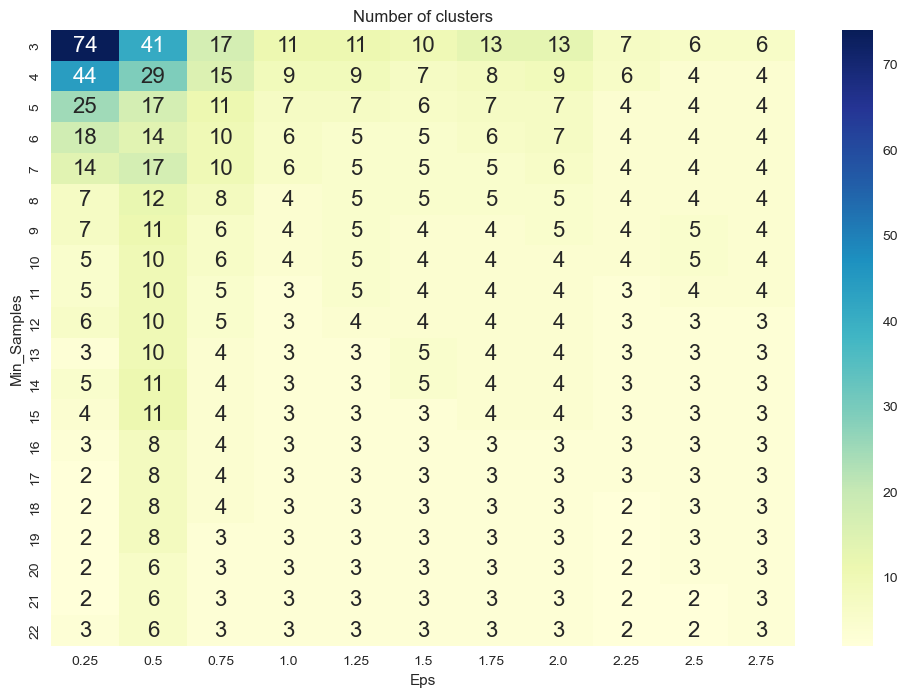

In [60]:
# Collecting number of generated clusters.

tmp=pd.DataFrame.from_records(DBSCAN_params,columns=["Eps","Min_Samples"])
tmp["No_of_clusters"]=no_of_clusters
pivot_1=pd.pivot_table(tmp,values="No_of_clusters",index="Min_Samples",columns="Eps")

fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":16},cmap="YlGnBu",ax=ax)
ax.set_title("Number of clusters")
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()


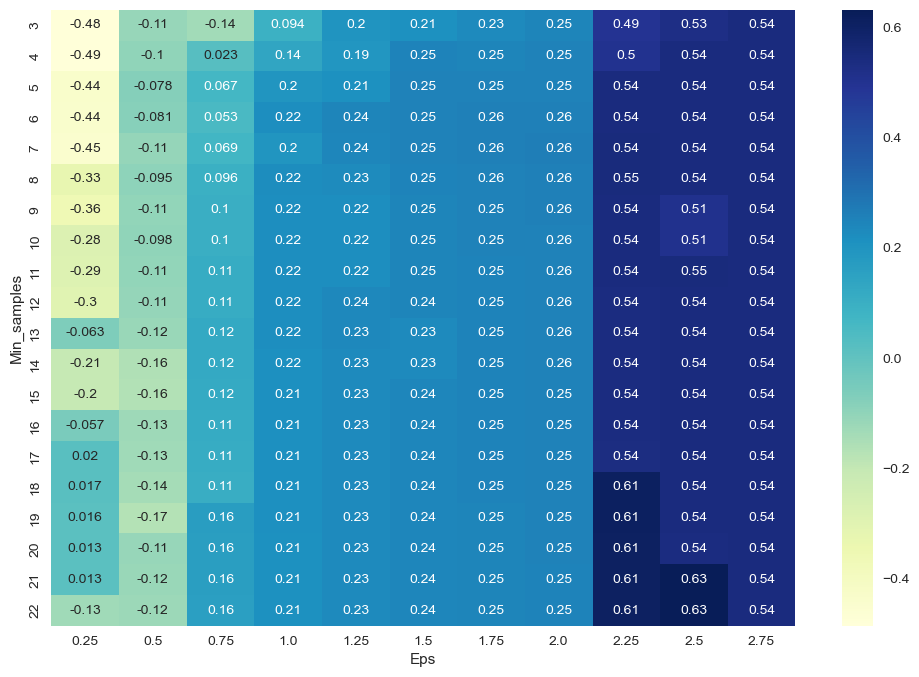

In [61]:
# As the heatplot above shows, the number of clusters vary from 74 to 2.

tmp=pd.DataFrame.from_records(DBSCAN_params,columns=["Eps","Min_samples"])
tmp["Sil_score"]=sil_score
pivot_1=pd.pivot_table(tmp,values="Sil_score",index="Min_samples",columns="Eps")

fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":10},cmap="YlGnBu",ax=ax)
plt.show()

In [62]:
# Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

epsilon= [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples= [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg=[]
max_value=[0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db=DBSCAN(min_samples=min_samples[j],eps=epsilon[i]).fit(std_airlines)
        
        #cluster_labels=dbscan.fit_predict(data) 
        
        core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        
        # Number of clusters in labels, ignoring noise if present.
        
        n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)
        
        silhouette_avg=silhouette_score(std_airlines,labels)
        if silhouette_avg>max_value[3]:
            max_value=(epsilon[i], min_samples[j],n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)
            
print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.25 
min_sample= 3 
number of clusters= 14 
average silhouette score= 0.1550


In [63]:
# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

dbscan=DBSCAN(eps=2.5,min_samples=21)
dbscan.fit(std_airlines)

DBSCAN(eps=2.5, min_samples=21)

In [64]:
# Concating Labels with main dataset copy

airlines_df["DBSCAN_Labels"]=dbscan.labels_
airlines_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0


In [65]:

airlines_df.groupby("DBSCAN_Labels").agg(["mean"])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
-1,1708.947115,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,2.038462,0.687500
0,2031.601688,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,1.662094,0.352941


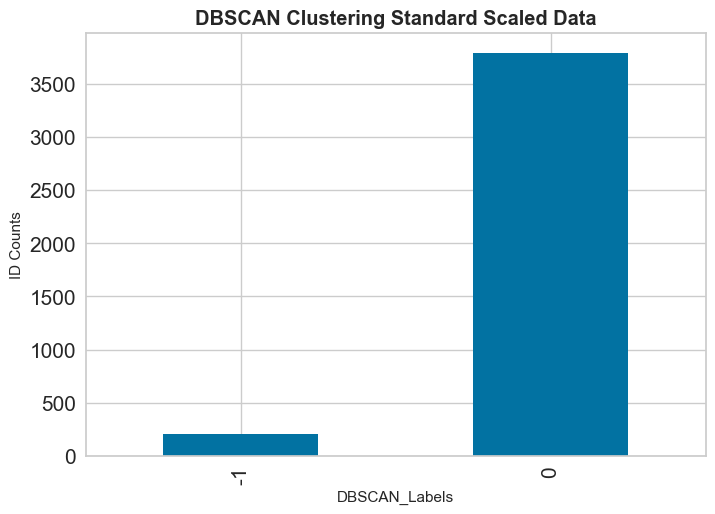

In [66]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

airlines_df.groupby(["DBSCAN_Labels"]).count()["ID"].plot(kind="bar")
plt.ylabel("ID Counts")
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [67]:
# DBSCAN on MinMax Scaled Data

# To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

from itertools import product

eps_values=np.arange(0.25,1.25,0.25)
min_samples=np.arange(3,23)
DBSCAN_params=list(product(eps_values,min_samples))

In [68]:
no_of_clusters=[]
sil_score=[]

for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(norm_airlines)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_airlines,DBS_clustering.labels_))
    

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


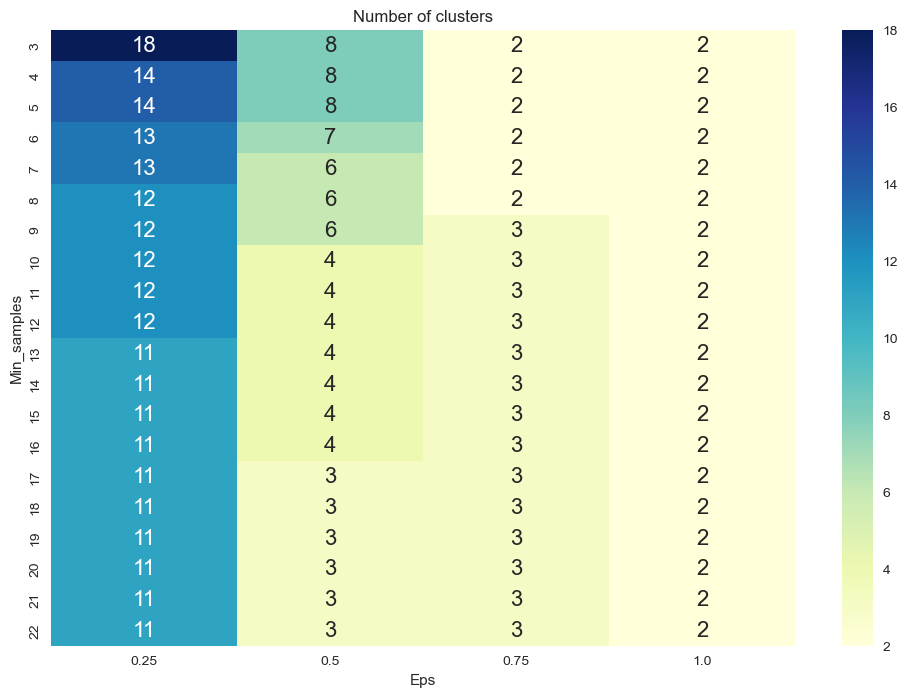

In [69]:
# Collecting number of generated clusters.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

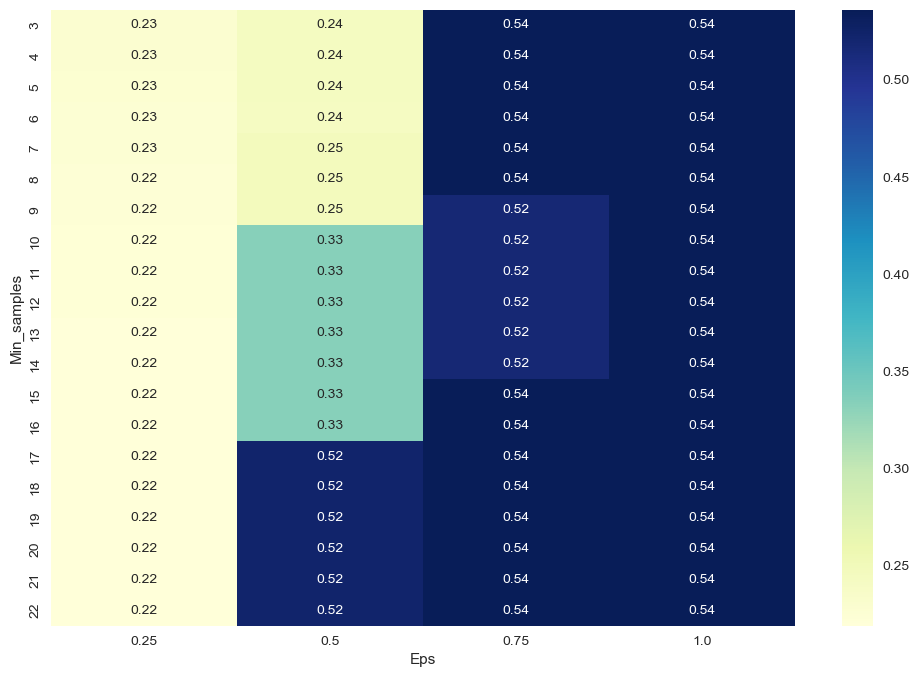

In [70]:
# As the heatplot above shows, the number of clusters vary from 18 to 2.

tmp=pd.DataFrame.from_records(DBSCAN_params,columns=["Eps","Min_samples"])
tmp["Sil_score"]=sil_score
pivot_1=pd.pivot_table(tmp,values="Sil_score",index="Min_samples",columns="Eps")

fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":10},cmap="YlGnBu",ax=ax)
plt.show()



In [71]:
# Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

epsilon=[0.25,0.5,0.75,1]
min_samples=[11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg=[]
max_value=[0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        
        db=DBSCAN(min_samples=min_samples[j],eps=epsilon[i]).fit(norm_airlines)
        
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        
        # Number of clusters in labels, ignoring noise if present.

        n_clusters=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)
        
        silhouette_avg=silhouette_score(norm_airlines,labels)
        if silhouette_avg>max_value[3]:
            max_value=(epsilon[i],min_samples[j],n_clusters_,silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.25 
min_sample= 11 
number of clusters= 14 
average silhouette score= 0.3632


In [72]:
epsilon=[0.25,0.5,0.75,1]
min_samples=[3,4,5,6,7,8,9,10,11]
sil_avg=[]
max_value=[0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        
        db=DBSCAN(min_samples=min_samples[j],eps=epsilon[i]).fit(norm_airlines)
        
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        labels=db.labels_
        
        # Number of clusters in labels, ignoring noise if present.
        n_clusters=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)
        
        silhouette_avg=silhouette_score(norm_airlines,labels)
        if silhouette_avg>max_value[3]:
            max_value=(epsilon[i],min_samples[j],n_clusters_,silhouette_avg)
        sil_avg.append(silhouette_avg)
        
print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 14 
average silhouette score= 0.5359


In [73]:
# Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

dbscan=DBSCAN(eps=1,min_samples=22)
dbscan.fit(norm_airlines)

DBSCAN(eps=1, min_samples=22)

In [74]:
# Concating Labels with main dataset copy

airlines_df["DBSCAN_Labels"]=dbscan.labels_
airlines_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1


In [75]:

airlines_df.groupby("DBSCAN_Labels").agg(["mean"])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.851867,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.392302,1.0


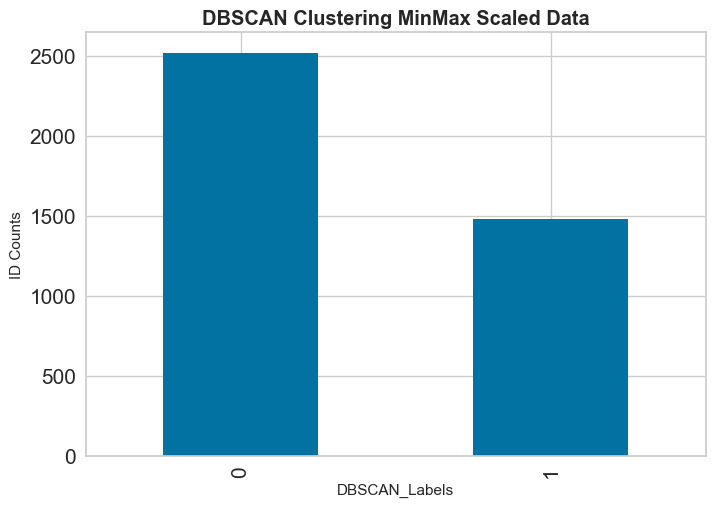

In [76]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

airlines_df.groupby(["DBSCAN_Labels"]).count()["ID"].plot(kind="bar")
plt.ylabel("ID Counts")
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [77]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1=pd.DataFrame(airlines_df.loc[airlines_df.DBSCAN_Labels==0].mean(),columns=["Cluster1_Avg"])
cluster2=pd.DataFrame(airlines_df.loc[airlines_df.DBSCAN_Labels==1].mean(),columns=["Cluster2_Avg"])
avg_airlines=pd.concat([cluster1,cluster2],axis=1)
avg_airlines

,Cluster1_Avg,Cluster2_Avg
ID,2173.169182,1745.592843
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595
